In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Map targets to priorities: 0 (malignant) = High, 1 (benign) = Low
y_priority = y.map({0: 'high', 1: 'low'})

print("Dataset Overview:")
print(f"Features shape: {X.shape}")
print(f"Target distribution:\n{y_priority.value_counts()}")
print(f"\nFeature names: {data.feature_names[:5]}...")  # First 5 features

Dataset Overview:
Features shape: (569, 30)
Target distribution:
low     357
high    212
Name: count, dtype: int64

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']...


In [9]:
# Check for missing values
print("Missing values in features:", X.isnull().sum().sum())
print("Missing values in target:", y_priority.isnull().sum())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_priority, test_size=0.3, random_state=42, stratify=y_priority
)

print(f"\n Data Split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Training class distribution:\n{y_train.value_counts()}")

Missing values in features: 0
Missing values in target: 0

 Data Split:
Training set: 398 samples
Testing set: 171 samples
Training class distribution:
low     250
high    148
Name: count, dtype: int64


In [10]:
# Create and train the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Random Forest model trained successfully!")
print(f"Number of trees: {model.n_estimators}")

Random Forest model trained successfully!
Number of trees: 100


In [11]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Model Performance:")
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"F1-Score: {f1:.4f}")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

Model Performance:
Accuracy: 0.9357 (93.57%)
F1-Score: 0.9356

Detailed Classification Report:
              precision    recall  f1-score   support

        high       0.92      0.91      0.91        64
         low       0.94      0.95      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



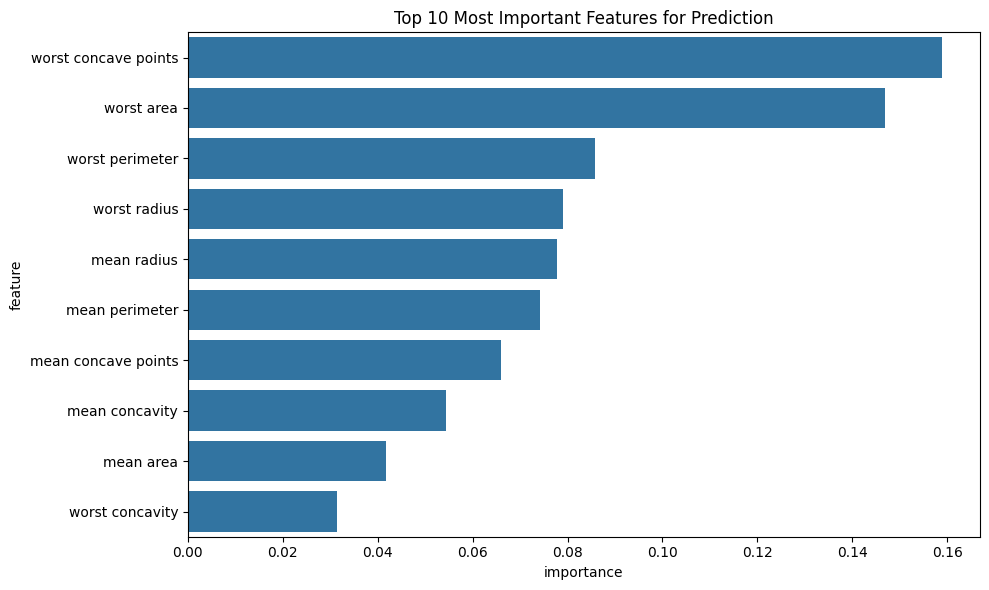

Top 5 most important features:
                 feature  importance
27  worst concave points    0.158955
23            worst area    0.146962
22       worst perimeter    0.085793
20          worst radius    0.078952
0            mean radius    0.077714


In [ ]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': data.feature_names,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features for Prediction')
plt.tight_layout()
plt.show()

print("Top 5 most important features:")
print(feature_importance.head())